### Autoencoders are neural networks that learn to compress and reconstruct data, using reconstruction error to detect anomalies.

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split

In [ ]:
# Load the dataset
df = pd.read_csv('Healthcare Providers.csv')

In [ ]:
# Drop irrelevant columns
drop_columns = [
    'index', 'National Provider Identifier',
    'Last Name/Organization Name of the Provider',
    'First Name of the Provider', 'Middle Initial of the Provider',
    'Street Address 1 of the Provider', 'Street Address 2 of the Provider',
    'Zip Code of the Provider', 'HCPCS Code'
]
df = df.drop(columns=drop_columns)

In [ ]:
# Handle missing values
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].fillna('Unknown')
    else:
        df[column] = df[column].fillna(df[column].mean())


In [ ]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le


In [ ]:
# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))


In [ ]:
# Split data into training and testing sets
X_train, X_test = train_test_split(scaled_features, test_size=0.2, random_state=42)


In [ ]:
# Autoencoder implementation
input_dim = X_train.shape[1]
encoding_dim = 14  # Reduced dimensionality


In [ ]:
# Define the autoencoder model
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
encoder = Model(inputs=input_layer, outputs=encoded)


In [ ]:
# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')


In [ ]:
# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))


In [10]:
# Extract the encoded features
encoded_features = encoder.predict(X_train)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 1.1620 - val_loss: 0.7918
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.7522 - val_loss: 0.6948
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6985 - val_loss: 0.6496
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6589 - val_loss: 0.6258
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6513 - val_loss: 0.6128
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6489 - val_loss: 0.6042
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.5981 - val_loss: 0.5975
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.5797 - val_loss: 0.5928
Epoch 9/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6399 - val_loss: 0.5892
Epoch 10/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.5889 - val_loss: 0.5865
Epoch 11/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.5949 - val_loss: 0.5843
Epoch 12/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

### Loss Convergence:

### The training loss (loss) and validation loss (val_loss) decreased steadily and then plateaued, which is a good sign.
### The final validation loss is slightly lower than the training loss, indicating the model is not overfitting.
### Plateaued Loss:

### The loss values have stabilized around 0.5752. This suggests the model has reached its capacity to minimize the reconstruction error given the current architecture and data.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from tensorflow.keras.callbacks import EarlyStopping


In [14]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [15]:
# Train the autoencoder with early stopping
history = autoencoder.fit(
    X_train,
    X_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, X_test),
    callbacks=[early_stopping]
)

Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 0.6401 - val_loss: 0.5740
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - loss: 0.6331 - val_loss: 0.5740
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.6458 - val_loss: 0.5740
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.6430 - val_loss: 0.5740
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.6144 - val_loss: 0.5740
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.5749 - val_loss: 0.5739
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.7255 - val_loss: 0.5740
Epoch 8/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.5959 - val_loss: 0.5740
Epoch 9/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.6182 - val_loss: 0.5740
Epoch 10/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.6431 - val_loss: 0.5739
Epoch 11/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.6318 - val_loss: 0.5740


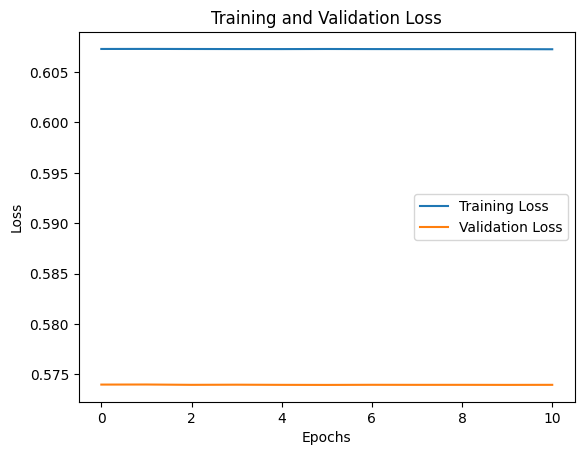

In [16]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [17]:
# Evaluate reconstruction error
reconstructed = autoencoder.predict(X_test)
reconstruction_errors = np.mean((X_test - reconstructed) ** 2, axis=1)

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


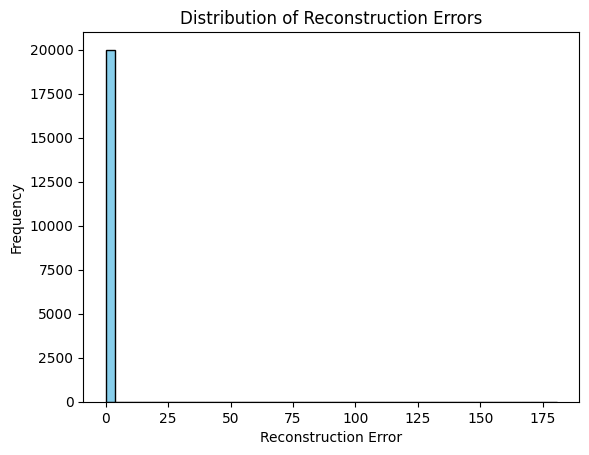

In [18]:
# Plot distribution of reconstruction errors
plt.hist(reconstruction_errors, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Reconstruction Errors')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.show()


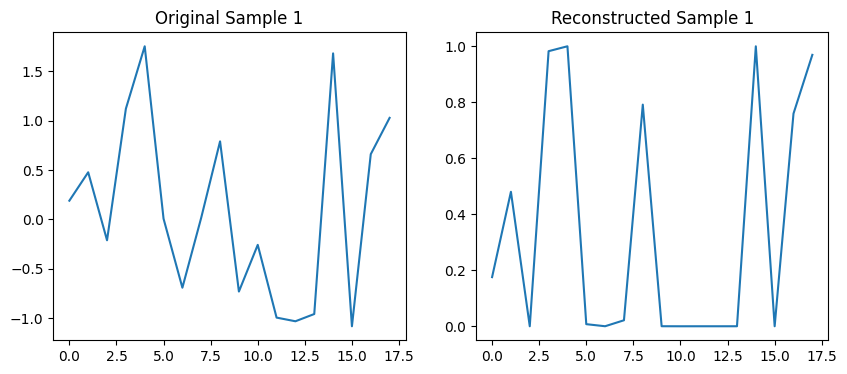

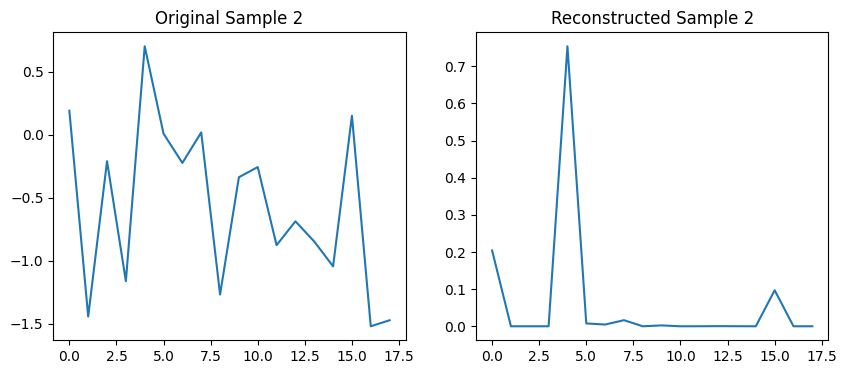

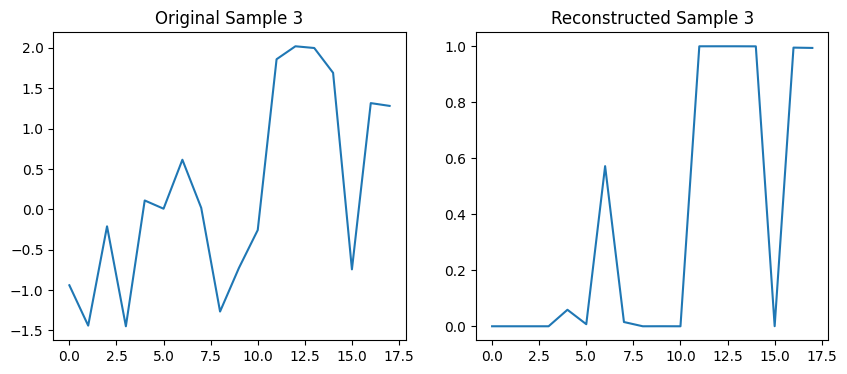

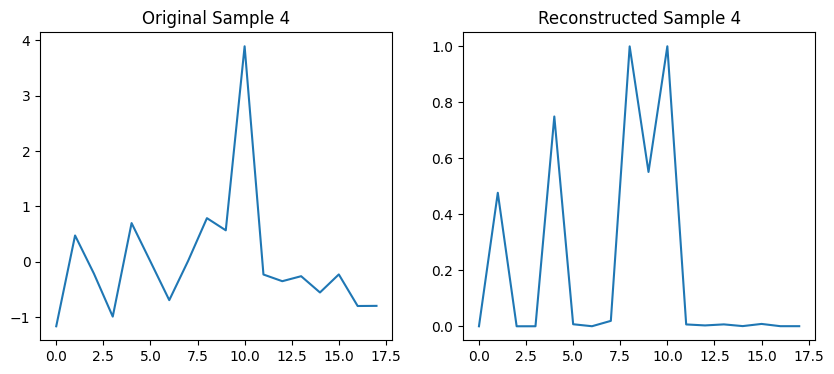

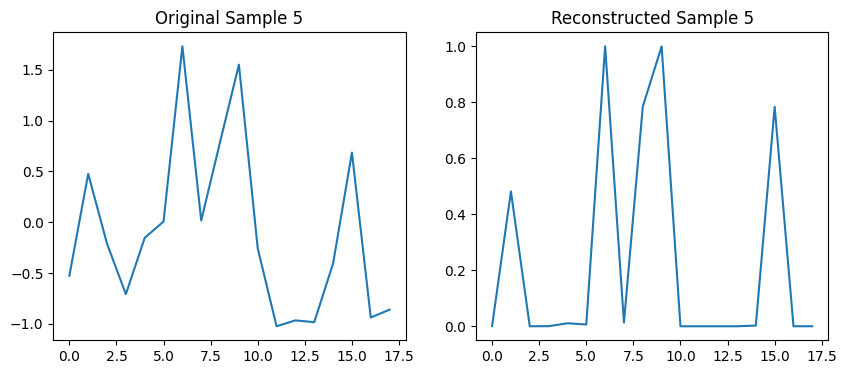

In [19]:
# Visualize original and reconstructed samples (for the first 5 examples)
for i in range(5):
    plt.figure(figsize=(10, 4))

    # Original
    plt.subplot(1, 2, 1)
    plt.title(f'Original Sample {i+1}')
    plt.plot(X_test[i])

    # Reconstructed
    plt.subplot(1, 2, 2)
    plt.title(f'Reconstructed Sample {i+1}')
    plt.plot(reconstructed[i])

    plt.show()


In [20]:
# Latent space extraction and visualization
encoded_samples = encoder.predict(X_test)


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [21]:
# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42)
encoded_tsne = tsne.fit_transform(encoded_samples)


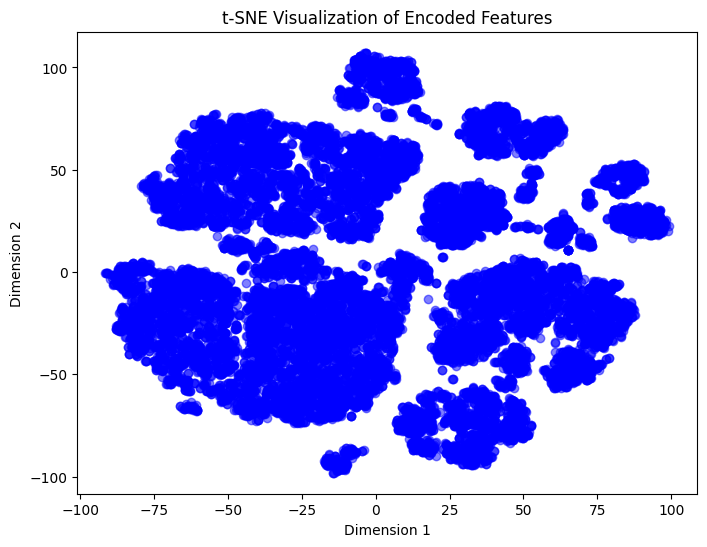

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(encoded_tsne[:, 0], encoded_tsne[:, 1], c='blue', alpha=0.5)
plt.title('t-SNE Visualization of Encoded Features')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


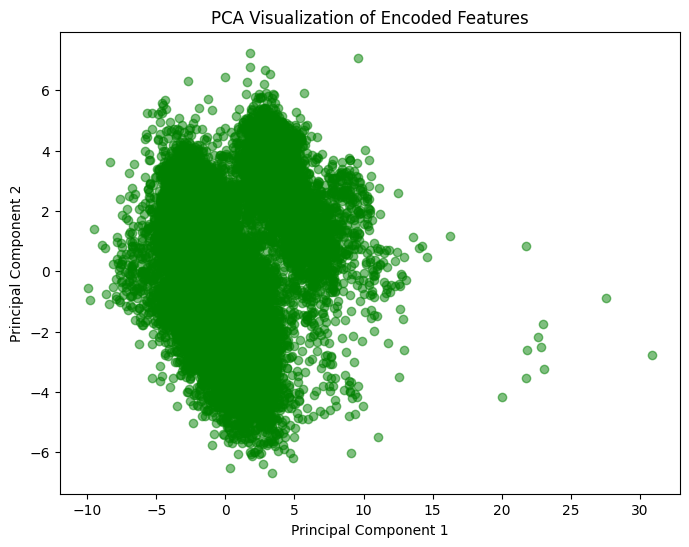

In [23]:

# Reduce dimensions using PCA
pca = PCA(n_components=2)
encoded_pca = pca.fit_transform(encoded_samples)

plt.figure(figsize=(8, 6))
plt.scatter(encoded_pca[:, 0], encoded_pca[:, 1], c='green', alpha=0.5)
plt.title('PCA Visualization of Encoded Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()